# Component 2: Interactive, Bespoke Visualization

Concept: What is the distribution of IMLS grants, and what do these grants do?

Your second dataset will be the IMLS discretionary grants database. These grants include information about the topic of the grant, the institution that received it, its duration, and a few other pieces of data. You may also find useful and interesting data (especially related to zip codes and economic factors) at FRED.

Your visualization should be interactive. There are several frameworks you can use to do this. The three that we have discussed in detail in class have been using the IPython widgets interface to build small, exploratory visualizations, the Bokeh framework and Plotly. You may not use Tableau to build this visualization. If there is another framework you would like to use, please ask.

A few of the concepts that you may explore:

1. What types of grants are supported by IMLS?

2. How are these grants distributed across the United States? Are they particularly clustered in certain states?

3. Is there a relationship between the economic factors in a zip code and the grants from IMLS?

Generate from this data either a notebook that can be executed, a python script that can be executed, or a plotly dashboard that can be accessed. If you utilize plotly, at lease some of the plotly setup must be in a python script.

In [1]:
#import packages
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import collections
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
plotly.tools.set_credentials_file(username='alexbear', api_key='L6m9DmfDjqrksfHtUH5j')
#plotly.tools.set_credentials_file(username='jlwang233', api_key='hBFucEx4GrL7V9xxFhx0')
#plotly.tools.set_credentials_file(username='lis590dv', api_key='0jCaIttf2QaVJ3lRZZlK')
#plotly.tools.set_credentials_file(username='jxljiang221', api_key='RgXxTYxCam4vBca8DHDq')
#plotly.tools.set_credentials_file(username='jxljiang221', api_key='LOONcFbgZszSxdiuB3Kn')

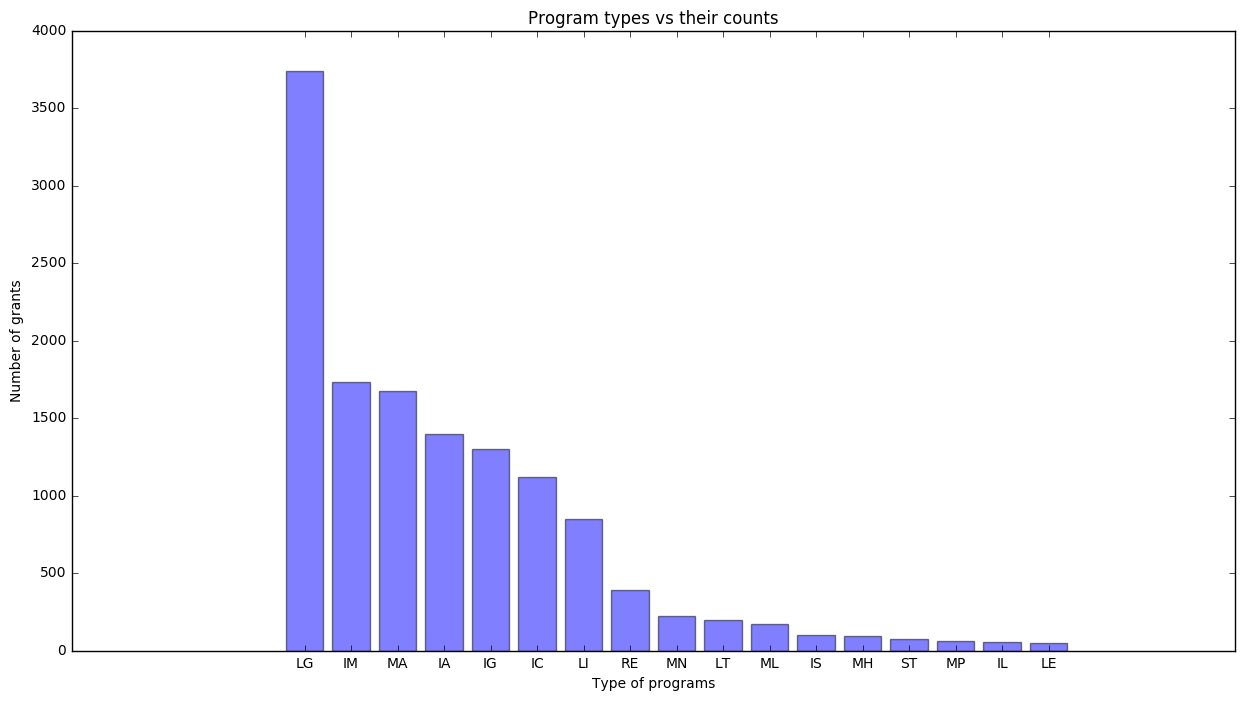

In [16]:
#Q2-1 BY YINGJUN GUAN: What types of grants are supported by IMLS?
plt.rcParams["figure.figsize"] = (15, 8)
df2 = pd.read_csv("DiscGrants96to13.csv",encoding='iso-8859-1')
cc=collections.Counter(df2["ProgramType"])
vv=[]
kk=[]
for v,k in sorted(cc.items(), key=lambda i: i[1], reverse=True):
    vv.append(v)
    kk.append(k)
    
objects = vv
y_pos = np.arange(len(objects))
performance = kk
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of grants')
plt.xlabel('Type of programs')
plt.title('Program types vs their counts')
 
plt.show()

In [3]:
sum(performance)

13218

In [4]:
performance

[3741,
 1731,
 1673,
 1397,
 1299,
 1121,
 846,
 388,
 220,
 198,
 168,
 102,
 91,
 71,
 64,
 57,
 51]

# Q2-1 What types of grants are supported by IMLS?

Description:

We make histogram to study the distribution of program types by counts of program types.

Findings:

1. LG(National Leadership Grants) contributes to the most count of grants, 3741, which is 28.3% of total grants. IL(Museum Leadership Initiatives) and LE(Native American Enhancement Grants) has the least number of grants, 57 and 51 respectively. 
2. Combined with Q2-2, LG and RE tend to have more amounts.

In [5]:
df2.head()

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 648,NaN,NaN,...,-166.536862,2.0,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 681420,NaN,NaN,...,-85.694757,1.0,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN
2,IA-00-00-0003-00,National Voting Rights Museum and Institute,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,6 Highway 80 East,NaN,NaN,...,-87.017024,1.0,47.0,957200.0,1005.0,92883.0,NaN,42820.0,NaN,NaN
3,IA-00-00-0004-00,Bob Jones Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 613,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IA-00-00-0005-00,Coronado Museum of History and Art,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,1100 Orange Avenue,NaN,NaN,...,-117.170703,6.0,73.0,10900.0,1021.0,92780.0,16378.0,41740.0,NaN,NaN


In [43]:
df3=df2[(df2["Longitude"]>-95)&(df2["Latitude"]<24)]
#df2=df2[(((df2["Longitude"]>-95)&(df2["Latitude"]<24))==False)]
df2=df2[((df2["InstState"]=="GU")|(df2["InstState"]=="PW")|(df2["InstState"]=="VI")|(df2["InstState"]=="PR")|(df2["InstState"]=="MP")|(df2["InstState"]=="FM")|(df2["InstState"]=="MH")|(df2["InstState"]=="AS")|(df2["InstState"]==""))==False]

In [7]:
df2.describe

<bound method NDFrame.describe of               LogNumber                                        Institution  \
0      IA-00-00-0001-00                            Museum of the Aleutians   
1      IA-00-00-0002-00                                 Depot Museum, Inc.   
2      IA-00-00-0003-00        National Voting Rights Museum and Institute   
3      IA-00-00-0004-00                                   Bob Jones Museum   
4      IA-00-00-0005-00                 Coronado Museum of History and Art   
5      IA-00-00-0006-00            Hayward Area Historical  Society Museum   
6      IA-00-00-0007-00                                        Sun Gallery   
7      IA-00-00-0008-00                Coachella Valley Historical Society   
8      IA-00-00-0009-00                                   Los Gatos Museum   
9      IA-00-00-0010-00                                 Gold Nugget Museum   
10     IA-00-00-0011-00                   Kimberly Crest House and Gardens   
11     IA-00-00-0012-00       

In [8]:
#Q2-2a BY XINYU ZHANG How are these grants distributed across the United States? Are they particularly clustered in certain states?
yearly=[] 
state=[]
for year,group in df2.groupby('FiscalYear'):
    print (year)
    df_2=group.groupby('InstState')
#     state=df4['InstState'].unique()
    state.append(df_2.groups)
    total=df_2['AwardTotal'].sum()
    print(total)
    yearly.append(total)
#print(yearly[0])

1996
InstState
AK      95833.0
AL      21315.0
AR     164414.0
AZ     264753.0
CA    1749844.0
CO     552071.0
CT     291004.0
DC     107129.0
DE     387649.0
FL     428138.0
GA     381320.0
HI      34877.0
IA      88955.0
IL     857809.0
IN     234722.0
KS     184225.0
KY     197818.0
LA     174295.0
MA    1858747.0
MD     450698.0
ME     334468.0
MI     705099.0
MN     580732.0
MO     169010.0
MS      10460.0
MT     117775.0
NC     779323.0
ND     101761.0
NE     233085.0
NH     308452.0
NJ     128336.0
NM     119032.0
NV       3950.0
NY    1928777.0
OH     899762.0
OK       6510.0
OR     281356.0
PA    1586867.0
RI      15840.0
SC     506310.0
SD      93618.0
TN     211758.0
TX     306468.0
UT     126072.0
VA     281803.0
VT     177204.0
WA     449297.0
WI     427732.0
WV      10060.0
WY      31315.0
Name: AwardTotal, dtype: float64
1997
InstState
AK     121215.0
AL     243470.0
AR     102324.0
AZ     578131.0
CA    1553503.0
CO     326619.0
CT     733580.0
DC      41175.0
DE      6

In [29]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df5=df2.groupby('FiscalYear').get_group(1996)
df4=df5.groupby('InstState')
    #df5=df4.get_group
state=[]
amount=[]
for name,group in df4:
    state.append(str(name))
    amount.append(str(group['AwardTotal'].sum()))
#     state=df4['InstState'].unique()
#     state.append(df4.groups)
location = pd.DataFrame(state,columns = ['state'])
total= pd.DataFrame(amount,columns = ['amount'])
#     yearly.append(total)
# for i in range(3):
data = [ dict(
            type='choropleth',
            colorscale = scl,
#             autocolorscale = False,
#         locations=df['InstState'].unique(),

#             locations=state[i],
#             z = yearly[i],
            locations = location['state'],
            z = total['amount'],
#             df4['text'] = 'State: ' + df4.groups+ '<br>Total Amount: '+ z + ' dollar',
            text = 'State: ' + location['state'] + '<br>Total Amount: '+ total['amount'] + ' dollar',
            locationmode = 'USA-states',
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                ) ),
            colorbar = dict(
                title = "Millions USD")
            ) ]
layout = dict(
            #title = str(1996+i)+'US Administrative Discretionary Grants<br>(Hover for breakdown)',
            title = '1996 US Administrative Discretionary Grants<br>(Hover for breakdown)',
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )
fig = dict( data=data, layout=layout )
py.plotly.iplot( fig)
#break
    #py.iplot(fig)

In [30]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df5=df2.groupby('FiscalYear').get_group(2013)
df4=df5.groupby('InstState')
    #df5=df4.get_group
state=[]
amount=[]
for name,group in df4:
    state.append(str(name))
    amount.append(str(group['AwardTotal'].sum()))
#     state=df4['InstState'].unique()
#     state.append(df4.groups)
location = pd.DataFrame(state,columns = ['state'])
total= pd.DataFrame(amount,columns = ['amount'])
#     yearly.append(total)
# for i in range(3):
data = [ dict(
            type='choropleth',
            colorscale = scl,
#             autocolorscale = False,
#         locations=df['InstState'].unique(),

#             locations=state[i],
#             z = yearly[i],
            locations = location['state'],
            z = total['amount'],
#             df4['text'] = 'State: ' + df4.groups+ '<br>Total Amount: '+ z + ' dollar',
            text = 'State: ' + location['state'] + '<br>Total Amount: '+ total['amount'] + ' dollar',
            locationmode = 'USA-states',
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                ) ),
            colorbar = dict(
                title = "Millions USD")
            ) ]
layout = dict(
            #title = str(1996+i)+'US Administrative Discretionary Grants<br>(Hover for breakdown)',
            title = '2013 US Administrative Discretionary Grants<br>(Hover for breakdown)',
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )
fig = dict( data=data, layout=layout )
py.plotly.iplot( fig)
#break
    #py.iplot(fig)

# Q2-2a Heatmap - How are grants distributed across the United States?

Description:

We make heatmap on 1996 and 2013 total grant amount by 51 states and also the DC region. For the convenience of plotting, region with the abbreviation 'GU','PW','VI','MP','FM','MH''AS','PR' are omitted. The state with deeper color was entitled with larger amount. 

Findings:

1. Classified by the total amount granted to a state, we can see that there are some states that are more likely to be granted more grants although there might be variations through years. For instance, NYC, California, Texas, Illinois, Washington, etc. 

2. Variations through years can be either the variation in amount or distribution. For instance, the maximum grants increased from 1.92 million up to 7.56 million. Another example is that California is the third at the granted amount in 1996 but was only amoung the middle in 2013. 

3. There are also states who wasn't granted during these seven years. For instance, DE in the year 2010 and 2013, NJ in the year 2009 and 2012.

In [45]:
#Q2-2b BY XIAOLIANG JIANG
df2['Text'] = df2['Institution'] + '<br>' + df2['Program'] + '<br>' + 'Program Type: ' + df2['ProgramType'] + '<br>' + 'Total Award: ' + (df2['AwardTotal']/1e3).astype(str)+ ' thousand'
#df2['text'] = df2['Institution'] + 'Total Award' + (df2['AwardTotal']/1e3).astype(str)+ ' thousand'
limits = [(0,10),(10,100),(100,200),(200,500),(500,1000),(1000,3000)]
#colors = ["#ffcccc","#ffddcc","#ffeecc","#ffffcc","#eeffcc","#ddffcc"]
colors = ["e0e0e0","#66b2ff","#66ff66","#ffff66","#ffb266","#ff6666"]
institutions = []
scale = 6000

for i in range(len(limits)):
    subdf2=df2[((df2['AwardTotal']/1e3)<limits[i][1])&((df2['AwardTotal']/1e3)>limits[i][0])]
    institution = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = subdf2['Longitude'],
        lat = subdf2['Latitude'],
        text = subdf2['Text'],
        marker = dict(
            size = subdf2['AwardTotal']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name ='{0} - {1}'.format(limits[i][0],limits[i][1])+'  thousand dollar' )
    institutions.append(institution)

In [46]:
layout = dict(
        title = 'Administrative Discretionary Grants<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
        updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True, True, True, True, True, True]],
                    label='All',
                    method='restyle'
                ),
                dict(
                    args=['visible', [True, False, False, False, False, False]],
                    label='0-10 thousand dollar',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, True, False, False, False, False]],
                    label='10-100 thousand dollar',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, True, False, False, False]],
                    label='100-200 thousand dollar',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, True, False, False]],
                    label='200-500 thousand dollar',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, True, False]],
                    label='500-1000 thousand dollar',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, False, True]],
                    label='1000+ thousand dollar',
                    method='restyle'
                )
            ]),
        )
    ]),
    )

fig = dict( data=institutions, layout=layout )
py.iplot( fig, validate=False, filename='q2testworldmap' )

# Q2-2b How are Grants classified by grant amounts distributed?

Description
 
The Choropleth Inset Map above is classified by project sized in different locations. There are 18 missing values and we add them mannually by looking for the address on the Google Map and record each instance's longitude and latitute. With the interactive map, you can view a single project amount class by double click on the color spot in front of the tag and hide the colorful spots by single click the spot before the item tag. If you put 

Summary (thousand dollars):
 
1. 0-10: largest counts, nationwide, clustered on AK, northeast and west coast
2. 10-100: large counts, nationwide, clustered on eastern, especially northeast
3. 100-200: less counts, nationwide, clustered on northeast and west coast
4. 200-500: less counts, clustered on Hawaii and eastern, especially northeast 
5. 500-1000: small counts, clustered on north east, not so many on middle and west
6. 1000-3000: only several counts, only at IL, NYC, DC and PA.

Conclusion:
 
Large amount of grants have less counts, grants are most likely to be clustered on northeast.

In [57]:
temmm=df2["ProgramType"].value_counts().reset_index().rename(columns={'index': 'x'})

In [59]:
temmm

,x,ProgramType
0,LG,3726
1,IM,1723
2,MA,1668
3,IA,1389
4,IG,1298
5,IC,1120
6,LI,846
7,RE,385
8,MN,220
9,LT,198


In [58]:
df2['Text'] = df2['Institution'] + '<br>' + df2['Program'] + '<br>' + 'Program Type: ' + df2['ProgramType'] + '<br>' + 'Total Award: ' + (df2['AwardTotal']/1e3).astype(str)+ ' thousand'
#df2['text'] = df2['Institution'] + 'Total Award' + (df2['AwardTotal']/1e3).astype(str)+ ' thousand'
#limits = [(0,10),(10,100),(100,200),(200,500),(500,1000),(1000,3000)]
#colors = ["#ffcccc","#ffddcc","#ffeecc","#ffffcc","#eeffcc","#ddffcc"]
colors = ["#ff6666","#ffb266","#ffff66","#b2ff66","#66ff66","#66ffb2","#66ffff","#66b2ff","#6666ff","#ff66ff","#b266ff","#ff66b2","#000000","#404040","#808080","#c0c0c0","#ffffff"]
#pt=["IL","ST","ML","RE","IC","IM","IS","MN","LE","MP","MH","LT","LI","IG","MA","IA","IG"]
pt=temmm["x"]
institutions = []
scale = 5000

for i in range(len(colors)):
    subdf2=df2[df2["ProgramType"]==pt[i]]
    institution = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = subdf2['Longitude'],
        lat = subdf2['Latitude'],
        text = subdf2['Text'],
        marker = dict(
            size = subdf2['AwardTotal']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name =pt[i])
    institutions.append(institution)
layout = dict(
        title = 'Administrative Discretionary Grants<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = dict( data=institutions, layout=layout )
py.iplot( fig, validate=False, filename='q2testworldmap' )

# Q2-2c How are Grants classified by types distributed?

Description:
 
This interactive Choropleth Inset Map shows the geographic distribution of grant types in the United States. The size of spots on the map represents the amount of the grant. Some spots have deeper color because there are many grants at the same position.
 
Summary:
 
01. LG, 	2-10000k,  largest,   clustered on west coast and northeast, less on middle-west
02. IM, 	2k	    , larger, 	  clustered on west coast and northeast, less on middle-west
03. MA, 	20k-150k, larger, 	  clustered on west coast and northeast, less on middle-west
04. IA, 	3k-7k, 	 large, 	  clustered on west coast and northeast, less on middle-west
05. IG, 	20k-500k,  large, 	  clustered on northeast corner
06. IC, 	2k-150k, 	 large, 	  clustered on northeast, less on middle and west
07. LI, 	4k-5k, 	 large, 	  middle and west
08. RE, 	50-900k, 	 small, 	  more on east
09. MN, 	20-50k, 	 small, 	  middle and west
10. LT, 	2k, small, 	  west
11. ML, 	20-150k, 	 small, 	  clustered on northeast corner
12. IS, 	20-100k,  small, 	  more on east
13. MH,	 20-150k, 	 smaller,   clustered on southeast
14. ST, 	20-500k, 	 smaller,   clustered on northeast and southwest
15. MP, 	150-500k,  smaller,   clustered on northeast corner and CA
16. IL, 	20-150k, 	 smaller,   clustered on northeast, not so many on middle
17. LE, 	60-420k, 	 smallest,  clustered on middle and north
 
Conclusion:
 
Most grant types has a certain amount range and tends to be more clustered on CA and northeast.


In [36]:
#Q2-3 BY JIALU WANG
fn1 = "amt.csv"
with open(fn1, "r") as f:
    reader1 = csv.reader(f)
    header1 = next(reader1)
    data1 = {}
    for column1 in header1:
        data1[column1] = []
    for row1 in reader1:
        for column1, value1 in zip(header1, row1):
            data1[column1].append(value1)
            
fn2 = "GeoFRED_Total_Gross_Domestic_Product_by_State_Millions_of_Dollars.csv"
with open(fn2, "r") as f:
    reader2 = csv.reader(f)
    header2 = next(reader2)
    data2 = {}
    for column2 in header2:
        data2[column2] = []
    for row2 in reader2:
        for column2, value2 in zip(header2, row2):
            data2[column2].append(value2)

In [37]:
plt.rcParams["figure.figsize"] = (40, 20)
states =data2['InstState']
AWT1997=data1['1997']
GDP1997=data2['1997']
AWT1998=data1['1998']
GDP1998=data2['1998']
AWT1999=data1['1999']
GDP1999=data2['1999']
AWT2000=data1['2000']
GDP2000=data2['2000']
AWT2001=data1['2001']
GDP2001=data2['2001']
AWT2002=data1['2002']
GDP2002=data2['2002']
AWT2003=data1['2003']
GDP2003=data2['2003']
AWT2004=data1['2004']
GDP2004=data2['2004']
AWT2005=data1['2005']
GDP2005=data2['2005']
AWT2006=data1['2006']
GDP2006=data2['2006']
AWT2007=data1['2007']
GDP2007=data2['2007']
AWT2008=data1['2008']
GDP2008=data2['2008']
AWT2009=data1['2009']
GDP2009=data2['2009']
AWT2010=data1['2010']
GDP2010=data2['2010']
AWT2011=data1['2011']
GDP2011=data2['2011']
AWT2012=data1['2012']
GDP2012=data2['2012']
AWT2013=data1['2013']
GDP2013=data2['2013']


trace11 = go.Scatter(
    x = states,
    y = AWT1997,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace12 = go.Scatter(
    x = states,
    y = GDP1997,
    mode = 'lines+markers',
    name = 'GDP'
)
trace21 = go.Scatter(
    x = states,
    y = AWT1998,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace22 = go.Scatter(
    x = states,
    y = GDP1998,
    mode = 'lines+markers',
    name = 'GDP'
)
trace31 = go.Scatter(
    x = states,
    y = AWT1999,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace32 = go.Scatter(
    x = states,
    y = GDP1999,
    mode = 'lines+markers',
    name = 'GDP'
)
trace41 = go.Scatter(
    x = states,
    y = AWT2000,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace42 = go.Scatter(
    x = states,
    y = GDP2000,
    mode = 'lines+markers',
    name = 'GDP'
)
trace51 = go.Scatter(
    x = states,
    y = AWT2001,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace52 = go.Scatter(
    x = states,
    y = GDP2001,
    mode = 'lines+markers',
    name = 'GDP'
)
trace61 = go.Scatter(
    x = states,
    y = AWT2002,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace62 = go.Scatter(
    x = states,
    y = GDP2002,
    mode = 'lines+markers',
    name = 'GDP'
)
trace71 = go.Scatter(
    x = states,
    y = AWT2003,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace72 = go.Scatter(
    x = states,
    y = GDP2003,
    mode = 'lines+markers',
    name = 'GDP'
)
trace81 = go.Scatter(
    x = states,
    y = AWT2004,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace82 = go.Scatter(
    x = states,
    y = GDP2004,
    mode = 'lines+markers',
    name = 'GDP'
)
trace91 = go.Scatter(
    x = states,
    y = AWT2005,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace92 = go.Scatter(
    x = states,
    y = GDP2005,
    mode = 'lines+markers',
    name = 'GDP'
)
trace101 = go.Scatter(
    x = states,
    y = AWT2006,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace102 = go.Scatter(
    x = states,
    y = GDP2006,
    mode = 'lines+markers',
    name = 'GDP'
)
trace111 = go.Scatter(
    x = states,
    y = AWT2007,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace112 = go.Scatter(
    x = states,
    y = GDP2007,
    mode = 'lines+markers',
    name = 'GDP'
)
trace121 = go.Scatter(
    x = states,
    y = AWT2008,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace122 = go.Scatter(
    x = states,
    y = GDP2008,
    mode = 'lines+markers',
    name = 'GDP'
)
trace131 = go.Scatter(
    x = states,
    y = AWT2009,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace132 = go.Scatter(
    x = states,
    y = GDP2009,
    mode = 'lines+markers',
    name = 'GDP'
)
trace141 = go.Scatter(
    x = states,
    y = AWT2010,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace142 = go.Scatter(
    x = states,
    y = GDP2010,
    mode = 'lines+markers',
    name = 'GDP'
)
trace151 = go.Scatter(
    x = states,
    y = AWT2011,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace152 = go.Scatter(
    x = states,
    y = GDP2011,
    mode = 'lines+markers',
    name = 'GDP'
)
trace161 = go.Scatter(
    x = states,
    y = AWT2012,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace162 = go.Scatter(
    x = states,
    y = GDP2012,
    mode = 'lines+markers',
    name = 'GDP'
)
trace171 = go.Scatter(
    x = states,
    y = AWT2013,
    mode = 'lines+markers',
    name = 'Awarded Amount'
)
trace172 = go.Scatter(
    x = states,
    y = GDP2013,
    mode = 'lines+markers',
    name = 'GDP'
)

mydata = [trace11,trace12,trace21,trace22,trace31,trace32,trace41,trace42,
         trace51,trace52,trace61,trace62,trace71,trace72,trace81,trace82,
         trace91,trace92,trace101,trace102,trace111,trace112,trace121,trace122,
         trace131,trace132,trace141,trace142,trace151,trace152,trace161,trace162,
         trace171,trace172]
layout = Layout(
    title='Total State Amount vs GDP by State Per Year',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True,True, False, False,False, False, False, False,
                                      False, False, False, False,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False]],
                    label='1997',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, True,True,False, False, False, False,
                                      False, False, False, False,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False]],
                    label='1998',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, True,True,False, False,
                                      False, False, False, False,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False]],
                    label='1999',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, False, False,True,True,
                                      False, False, False, False,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False]],
                    label='2000',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, False, False,False, False, 
                                      True,True,False, False,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False]],
                    label='2001',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, False, False,False, False, 
                                      False, False,True,True,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False]],
                    label='2002',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, False, False,False, False, 
                                      False, False,False, False, True,True,False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False]],
                    label='2003',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, False, False,False, False, 
                                      False, False,False, False, False, False,True,True,
                                     False, False, False, False,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False]],
                    label='2004',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, False, False,False, False, 
                                      False, False,False, False, False, False,False, False, 
                                      True,True,False, False,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False]],
                    label='2005',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, False, False,False, False, 
                                      False, False,False, False, False, False,False, False, 
                                      False, False,True,True,False, False, False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False]],
                    label='2006',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, False, False,False, False, 
                                      False, False,False, False, False, False,False, False, 
                                      False, False,False, False, True,True,False, False,
                                     False, False, False, False,False, False, False, False,
                                     False, False]],
                    label='2007',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, False, False,False, False, 
                                      False, False,False, False, False, False,False, False, 
                                      False, False,False, False, False, False,True,True,
                                     False, False, False, False,False, False, False, False,
                                     False, False]],
                    label='2008',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, False, False,False, False, 
                                      False, False,False, False, False, False,False, False, 
                                      False, False,False, False, False, False,False, False, 
                                      True,True,False, False,False, False, False, False,
                                     False, False]],
                    label='2009',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, False, False,False, False, 
                                      False, False,False, False, False, False,False, False, 
                                      False, False,False, False, False, False,False, False, 
                                      False, False,True,True,False, False, False, False,
                                     False, False]],
                    label='2010',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, False, False,False, False, 
                                      False, False,False, False, False, False,False, False, 
                                      False, False,False, False, False, False,False, False, 
                                      False, False,False, False, True,True,False, False,
                                     False, False]],
                    label='2011',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, False, False,False, False, 
                                      False, False,False, False, False, False,False, False, 
                                      False, False,False, False, False, False,False, False, 
                                      False, False,False, False, False, False,True,True,
                                     False, False]],
                    label='2012',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False, False, False, False, False, False,False, False, 
                                      False, False,False, False, False, False,False, False, 
                                      False, False,False, False, False, False,False, False, 
                                      False, False,False, False, False, False,False, False,
                                      True,True]],
                    label='2013',
                    method='restyle'
                ),
                
            ]),
        )
    ]),
)
fig = Figure(data=mydata, layout=layout)
py.iplot(fig)



# Q2-3 relationship between the economic factors(GDP) in a zip code and the grants from IMLS?
 
Description：
The graph is a comparison between total awarded amount by state and GDP by state, as an indicator for the economic environment.The dropdown menu is the year of the statistics. 
 
Findings:

1. there are states with higher GDP that generally has higher amount of grants. For instance, CA, FL, PA, TX, NM has higher GDP compared to other states and they are also entitled with higher grant amount. 
 
2. However, there are also some states such as IL and NY with low GDP but high grant amount. They might be promoted by the government to support local library and museum development.

3. with the steady increasement of GDP year by year, the grant amount also sees a general increasing trend.

4. during financial crisis, some states are granted with less or no funds.
